# Midterm

Ok, we've reviewed a lot so far, so before we continue onto more specific kinds of analysis, using LLMs, and machine learning, complete this notebook that builds on the lessons in this series on pandas and EDA.

___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

## Import Pandas

In [1]:
import pandas as pd
pd.options.display.max_rows = 200

## Import the Data

In [2]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [3]:
film_df.sample(10)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
16269,Room,2015,Jack,man,1888,0.232742,9.0,10.0,5462
5516,Cold Mountain,2003,Blind Man,man,266,0.011157,75.0,137.0,2033
15235,Sweeney Todd: The Demon Barber of Fleet Street,2007,Judge Turpin,man,751,0.086821,61.0,66.0,5083
4872,Blue Velvet,1986,Ben,man,170,0.008252,50.0,20.0,1866
4653,Beloved,1998,Halle,man,574,0.020293,32.0,42.0,1807
1003,Double Indemnity,1944,Walter Neff,man,5704,0.427394,36.0,NaN,869
2861,The Silence of the Lambs,1991,Mr. Yow,man,104,0.008715,NaN,270.0,1330
11095,Tinker Tailor Soldier Spy,2011,Bill Haydon,man,605,0.064403,51.0,26.0,3563
14404,Panther,1995,Rose,man,328,0.033493,26.0,13.0,4765
19037,Riddick,2013,Vargas,man,398,0.080339,47.0,44.0,7252


Generate information about all the columns in the data 

In [4]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23047 non-null  object 
 1   release_year            23047 non-null  int64  
 2   character               23047 non-null  object 
 3   gender                  23047 non-null  object 
 4   words                   23047 non-null  int64  
 5   proportion_of_dialogue  23047 non-null  float64
 6   age                     18262 non-null  float64
 7   gross                   19386 non-null  float64
 8   script_id               23047 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of the DataFrame

array([[<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'proportion_of_dialogue'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'script_id'}>]], dtype=object)

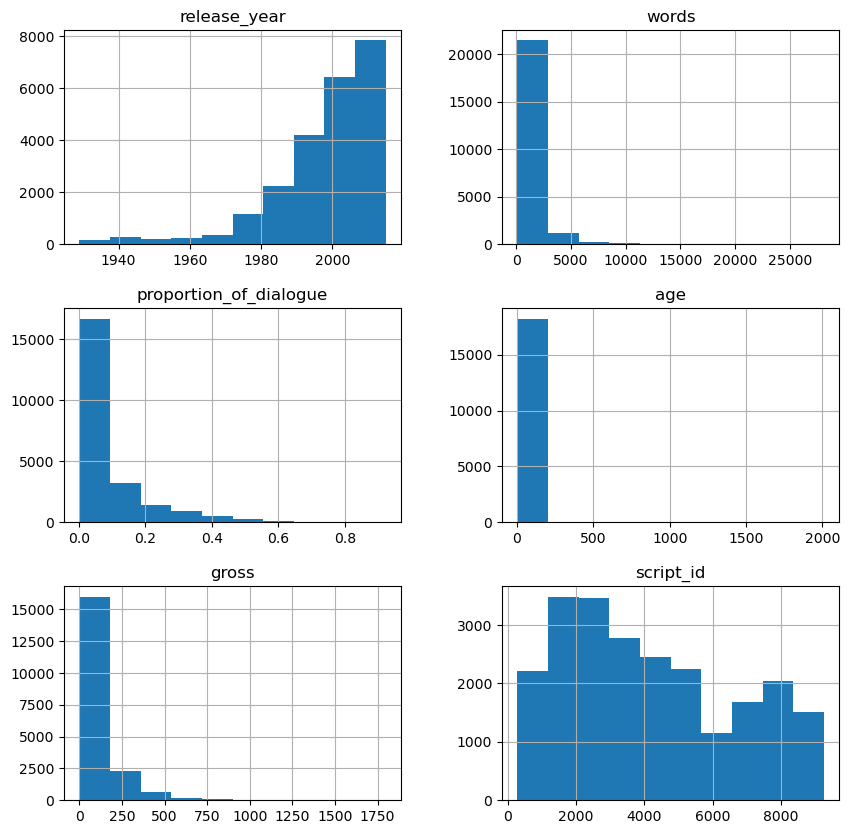

In [5]:
film_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [6]:
film_df.describe(include='all')

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
count,23047,23047.000000,23047,23047,23047.000000,23047.000000,18262.000000,19386.000000,23047.000000
unique,1994,NaN,17543,3,NaN,NaN,NaN,NaN,NaN
top,Lone Star,NaN,Doctor,man,NaN,NaN,NaN,NaN,NaN
freq,40,NaN,37,16131,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.132425,NaN,NaN,907.902634,0.086518,42.275052,106.735428,4194.804486
std,NaN,14.746052,NaN,NaN,1399.616135,0.107746,57.912595,145.861933,2473.037601
min,NaN,1929.000000,NaN,NaN,101.000000,0.001537,3.000000,0.000000,280.000000
25%,NaN,1992.000000,NaN,NaN,193.000000,0.019773,30.000000,22.000000,2095.000000
50%,NaN,2001.000000,NaN,NaN,396.000000,0.042423,39.000000,56.000000,3694.000000
75%,NaN,2009.000000,NaN,NaN,980.000000,0.104171,50.000000,136.000000,6224.500000


### ❓ What patterns or outliers do you notice?

ENTER YOUR RESPONSE: It appears that some of the statistics for certain columns are missing, i.e., labelled "NaN" for such fields as "unique", "top", or "frequency". However, on closer inspection, it appears that these are fields only valid for object types like for those in the title, character, or gender column. Another possible explanation could be that, although valid for int types, these fields (which seem to deal with unique values) are less likely to occur when compared to object/string types which are much more customizable and varied. For patterns, the count value 23047 seems to be both the largest and most common to occur in that field. This leads to me to believe that 23047 is actually the total number of characters analyzed in the dataset. In turn, this leads me to believe that there is missing data for the age and gross columns, as they have counts below 23047. For outliers, I strongly doubt that the max age of a character would be 2009, giving me the impression that the release year data and age data may have been confused during a certain point.


## Drop Rows

In [7]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
4024,American Psycho,2000,Harold Carnes,man,434,0.025271,2000.0,24.0,1639
5254,Case 39,2009,Margaret Sulliv,woman,310,0.037944,2009.0,15.0,1962
5370,Chaos,2005,Bernie Callo,man,244,0.015051,2005.0,NaN,1985
5950,The Departed,2006,Realtor,man,148,0.005575,2006.0,175.0,2144
6899,Get Carter,2000,Thorpey,man,133,0.026552,2000.0,24.0,2380
7787,Into the Wild,2007,Bull,man,188,0.009936,2007.0,23.0,2625
7968,Jay and Silent Bob Strike Back,2001,Silent Bob'S Mo,woman,224,0.009292,2001.0,46.0,2673
9233,Never Been Kissed,1999,Monty Malik,man,104,0.005219,1999.0,95.0,2986
9617,The Piano,1993,Nessie,woman,116,0.012262,1993.0,84.0,3095
9819,Raging Bull,1980,Reporter,man,300,0.013364,1980.0,NaN,3169


If you want to double check, you can examine the [data that the Pudding shared here](https://github.com/matthewfdaniels/scripts/blob/graphs/character_list5.csv) (you can control + F to search for specific characters).

In [8]:
film_df = film_df.drop(film_df[film_df['age'] > 100].index) 

In [9]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23031 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23031 non-null  object 
 1   release_year            23031 non-null  int64  
 2   character               23031 non-null  object 
 3   gender                  23031 non-null  object 
 4   words                   23031 non-null  int64  
 5   proportion_of_dialogue  23031 non-null  float64
 6   age                     18246 non-null  float64
 7   gross                   19373 non-null  float64
 8   script_id               23031 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.8+ MB


In [10]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


## Rename Columns

In [11]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [12]:
film_df.head()

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280


## Filter

Find a specific film that you're intersted and then filter the DataFrame for only rows relevant to that film. 

If you want to search for films by decade and genre, you can [search the with the Pudding's handy data viz here](https://pudding.cool/2017/03/film-dialogue/embed.html).

In [25]:
film_filter = film_df['title'] == "Forrest Gump"

If you want to sort by characters who speak the most, feel free to add `.sort_values(by='words', ascending=False)`

In [28]:
film_df[film_filter].sort_values(by='words', ascending=False)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
1227,Forrest Gump,1994,Forrest Gump,man,5446,0.599120,38.0,686.0,921
1229,Forrest Gump,1994,Lieutenant Dan,man,1228,0.135094,39.0,686.0,921
1232,Forrest Gump,1994,Young Jenny Cur,woman,951,0.104620,10.0,686.0,921
1231,Forrest Gump,1994,Mrs. Gump,woman,490,0.053905,48.0,686.0,921
1225,Forrest Gump,1994,Bubba Blue,man,475,0.052255,37.0,686.0,921
1230,Forrest Gump,1994,Local Anchor #1,man,162,0.017822,59.0,686.0,921
1226,Forrest Gump,1994,Drill Sergeant,man,129,0.014191,44.0,686.0,921
1228,Forrest Gump,1994,Hilary,woman,108,0.011881,38.0,686.0,921
1224,Forrest Gump,1994,Abbie Hoffman,man,101,0.011111,34.0,686.0,921


Now pick a character from this film (or another character) and filter the DataFrame by character.

In [29]:
character_filter = film_df['character'] == 'Forrest Gump'

In [30]:
film_df[character_filter]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
1227,Forrest Gump,1994,Forrest Gump,man,5446,0.59912,38.0,686.0,921


### ❓ How does this data align with your experience/knowledge of the film?

Although I haven't watched the film in a long time, the displayed data seems to align with my overall memory and expectations. For example, Forrest Gump, the titular movie character, has the most proportion of dialogue in the film, with it reaching just shy of 60% (which makes sense). Besides that, the release date, gender classifications for characters, ages, and other data seems to be correct to the best of my knowledge. (I was, however, surprised to learn about the small age gap between the actors who played Forrest Gump and Ms. Gump)

### ❓ How do these specific examples influence your thoughts about the data collection and categorization process? What would you have done differently (if anything)?

Overall, these examples analyzing the Pudding's Film Dialogue Data have made me more aware of some of the challenges and personal decision-making that occur during the data collection and categorization process. For instance, after evaluating the descriptive statistics of Pudding (namely the age and gross columns), I realized that missing data occurs a lot more frequently than I had initially believed. Moreover, it can occur without much consistency. So, while I already knew that data often gets lost to time, I was pretty surprised that data from such a relatively modern time period as these films (1929-2015) could also experience these issues. Additionally, I also realized that the labelling/categorization of data can be very intentional. For example, I noted how there was a "gender" instead of "sex" category which used values such as "man" and "woman", instead of "male" and "female" to describe characters, which I think was a very intentional decision to provide a boarder context for the data as the discussed in Pudding's background section. Furthermore, I believe that the "character" field was largely associated with the information of the actor who played them, as the age of the character actually appears to be derived from their real-world actor. I think that this decision was made due to the difficulty of accurately obtaining the ages of fictional characters. My only issue with this would for there to have also been an "actor" field to better help users make this connection. 

## Sort Values

Sort the DataFrame from the character who has the highest `proportion_of_dialogue` to the lowest.  Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [38]:
film_df.sort_values(by="proportion_of_dialogue", ascending=False).head(20)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
7242,Happy Feet,2006,Mumble,man,2677,0.923422,25.0,262.0,2483
16371,The End of the Tour,2015,David Lipsky,man,3117,0.911137,32.0,3.0,5485
21092,Duel,1971,David Mann,man,2660,0.881086,47.0,NaN,8164
3650,127 Hours,2010,Aron Ralston,man,4336,0.842760,32.0,20.0,1520
22236,Alfie,2004,Alfie,man,5852,0.814815,32.0,18.0,8683
21663,Mala Noche,1986,Walt,man,2093,0.810612,NaN,NaN,8423
1019,Duck Soup,1933,Groucho,man,3697,0.730344,NaN,NaN,873
4569,The Battle of Algiers,1966,Col. Mathieu,man,4962,0.723113,44.0,6.0,1780
17750,1408,2007,Mike Enslin,man,2338,0.703581,41.0,91.0,6537
18138,Jumpin' Jack Flash,1986,Terry Dolittle,woman,4722,0.699452,31.0,60.0,6798


Sort the DataFrame from the character who has the lowest `proportion_of_dialogue` to the highest. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [40]:
film_df.sort_values(by='proportion_of_dialogue').head(20)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
5283,Casino,1995,Piscano'S Wife,woman,104,0.001537,NaN,84.0,1963
5272,Casino,1995,Frankie Avalon,man,106,0.001566,56.0,84.0,1963
5291,Casino,1995,Vinny Forlano,man,112,0.001655,NaN,84.0,1963
5262,Casino,1995,Cashier,woman,114,0.001684,NaN,84.0,1963
5277,Casino,1995,La Banker,man,114,0.001684,61.0,84.0,1963
5292,Casino,1995,Winner,man,116,0.001714,NaN,84.0,1963
5286,Casino,1995,Security Guard,man,116,0.001714,55.0,84.0,1963
8031,JFK,1991,Prison Guard,man,106,0.001802,NaN,145.0,2682
5258,Casino,1995,Anna Scott,woman,124,0.001832,NaN,84.0,1963
5257,Casino,1995,Amy Rothstein (,woman,130,0.001921,NaN,84.0,1963


Sort the DataFrame from the character who speaks the least number of `words` to the character who speaks the most number of words. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [74]:
film_df.sort_values(by='words').head(20)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
15233,Sweeney Todd: The Demon Barber of Fleet Street,2007,Happy Customer',woman,101,0.011676,NaN,66.0,5083
20449,Lawless,2012,Danny,man,101,0.009168,46.0,40.0,7882
21869,Transcendence,2014,Martin,man,101,0.012063,44.0,24.0,8525
17979,My Best Friend's Birthday,1987,Cute Girl,woman,101,0.010254,NaN,NaN,6625
22909,The Utah Murder Project,2006,Deputy Bracken,man,101,0.008809,45.0,NaN,9214
18487,Inside Man,2006,Miriam Douglas,woman,101,0.008012,NaN,117.0,6968
17857,Searching for Bobby Fischer,1993,Tournament Dire,man,101,0.010766,53.0,15.0,6576
15725,"The Chronicles of Narnia: The Lion, the Witch ...",2005,Maugrim,man,101,0.021734,47.0,396.0,5300
16598,Pok�mon: The First Movie - Mewtwo Strikes Back,1998,Umio,man,101,0.032268,32.0,158.0,5523
1224,Forrest Gump,1994,Abbie Hoffman,man,101,0.011111,34.0,686.0,921


### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

After an initial glance, I definitely see a few patterns within the data. For example, an uncoincidental number of the characters with the least amount of words are simply named, i.e. having very short names like "Bob" that exclude last names or superficial names like "Cute Girl" or "Happy Customer" that function as plot-based descriptors. I also notice that many of these characters are around 40-50 years old, which - to me - makes sense, as that's a pretty standard age that would fit many background character personas. In general, both of these patterns were unsurprising to me. However, the one surprising pattern I found was that most of these films with the least amount of words allotted to characters were released in the 1990s and early 2000s, which perhaps suggests a trend in film scripting at the time or just a larger concentration of films being released in this period. 

## Groupby

Group by film and then calculate the sum total for every column.

In [48]:
film_df.groupby('title').sum()


C:\Users\Minh\AppData\Local\Temp\ipykernel_16896\661903833.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  film_df.groupby('title').sum()


,release_year,words,proportion_of_dialogue,age,gross,script_id
title,,,,,,
(500) Days of Summer,26117,18500,1.0,378.0,481.0,19942
10 Things I Hate About You,23988,19680,1.0,307.0,780.0,18144
12 Years a Slave,56364,19628,1.0,712.0,1680.0,42476
12 and Holding,30075,15968,1.0,513.0,0.0,22710
127 Hours,8040,5145,1.0,114.0,80.0,6080
...,...,...,...,...,...,...
Zero Effect,13986,13927,1.0,227.0,21.0,57106
Zerophilia,16040,16686,1.0,160.0,0.0,30144
Zodiac,62217,14656,1.0,1071.0,1271.0,201221


Group by film, isolate the `words` column, and then calculate the sum total for every column.

In [51]:
film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          18500
10 Things I Hate About You    19680
12 Years a Slave              19628
12 and Holding                15968
127 Hours                      5145
                              ...  
Zero Effect                   13927
Zerophilia                    16686
Zodiac                        14656
eXistenZ                       9447
xXx                            8285
Name: words, Length: 1994, dtype: int64

Group by film AND gender, isolate the column `words`, and then calculate the sum total for every column.

*Note: Remember that to group by multiple columns, you need to put the column names in square brackets `[]`.*

In [52]:
film_df.groupby(['title', 'gender'])['words'].sum()

title                       gender
(500) Days of Summer        man       12762
                            woman      5738
10 Things I Hate About You  man       10688
                            woman      8992
12 Years a Slave            man       16176
                                      ...  
Zodiac                      woman      1421
eXistenZ                    man        5695
                            woman      3752
xXx                         man        7287
                            woman       998
Name: words, Length: 3936, dtype: int64

## Filter, Then Groupby

Filter the DataFrame for only characters labeled as `woman`

In [53]:
women_filter = film_df['gender'] == 'woman'

In [54]:
women_film_df = film_df[women_filter]

Filter the DataFrame for only characters labeled as `man`

In [55]:
men_filter = film_df['gender'] == 'man'

In [56]:
men_film_df = film_df[men_filter]

Now group `women_film_df` by film, isolate the `words` column, and sum the `words` spoken by women.

In [57]:
women_film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Assign this Series to a new variable `women_by_film`

In [58]:
women_by_film = women_film_df.groupby('title')['words'].sum()
women_by_film

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Using the same construction, make a new another new variable `men_by_film`

In [59]:
men_by_film = men_film_df.groupby('title')['words'].sum()
men_by_film

title
(500) Days of Summer          12762
10 Things I Hate About You    10688
12 Years a Slave              16176
12 and Holding                10644
127 Hours                      4336
                              ...  
Zero Effect                   11711
Zerophilia                    12074
Zodiac                        13235
eXistenZ                       5695
xXx                            7287
Name: words, Length: 1992, dtype: int64

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [60]:
women_by_film.sort_values(ascending=False)[:20]

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Assign this sorted list of movies to the variable `top20_women`

In [61]:
top20_women = women_by_film.sort_values(ascending=False)[:20]
top20_women

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Using the same construction, make a new variable `top20_men`

In [62]:
top20_men = men_by_film.sort_values(ascending=False)[:20]
top20_men

title
Casino                    57944
JFK                       50752
A Few Good Men            36484
Funny People              36278
Magnolia                  33024
High Fidelity             31114
The Dark Knight           30290
Troy                      29712
Gran Torino               29092
Life                      27748
Observe and Report        27534
Apt Pupil                 27428
Analyze This              26548
The Hangover              26538
Mr. Deeds Goes to Town    26508
Wall Street               26440
Jackie Brown              25984
Sling Blade               24964
Meet John Doe             24520
Clerks                    24428
Name: words, dtype: int64

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

The most obvious pattern illustrated from the data above is that the top 20 films with dialogue delivered by men consistently place significantly higher than the top 20 films with dialogue delivered by women in terms of arregate word count. While this fact isn't necessarily too surprising given the current and historical state of hollywood and other media, the actual quantification is, with the top spot for men doubling its counterpart in the women's category. Additionally (based on my pretty scarce knowledge of cinema), it's seems like the two categories have different compositions in terms of genre, with the exception of drama which seems to overlap. Namely, the top films with the most dialogue for men seem to be centered around historical, criminal, and comedic subject matters, while the top films with the most dialogue for women seem to have greater occurences of drama and romance. Altogether, this isn't too surprising. A surprsing pattern I did find, however, is that - compared to the films with the most dialogue for female characters - the films with the most dialogue for male characters were more likely to have the name of a central character in their title (8 occurences compared to the women's 4). 

## Saving Plots

Make a bar chart of `top20_women`. Give the chart a title, and specify a color.

<Axes: title={'center': 'Top 20 films with most words spoken by women'}, xlabel='title'>

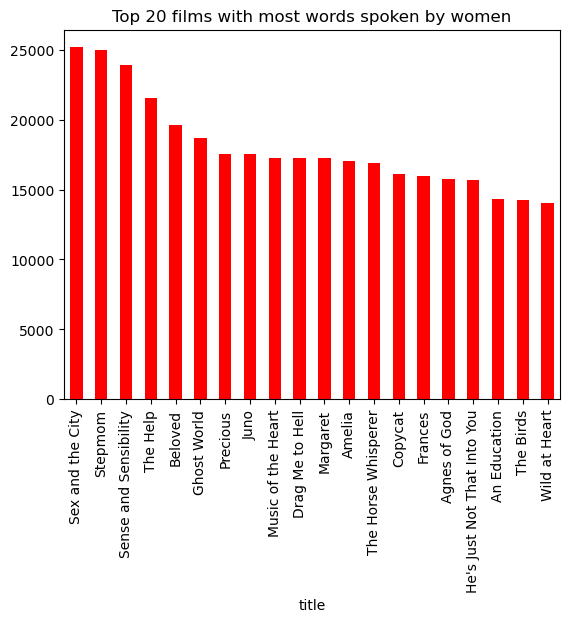

In [63]:
top20_women.plot(
    kind='bar',
    title='Top 20 films with most words spoken by women',
    color='red',
)

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

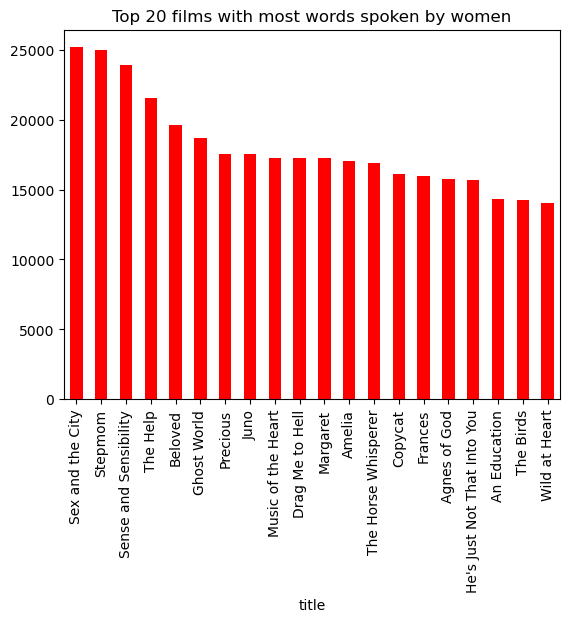

In [68]:
ax = top20_women.plot(
    kind='bar',
    title='Top 20 films with most words spoken by women',
    color='red',
)
ax.figure.savefig('./figures/top20_women.png')

Look in the file browser on the left and double click the PNG file. How does it look? Uh oh!

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

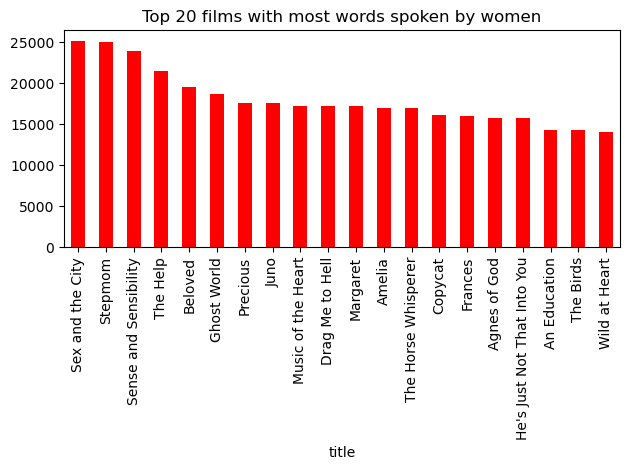

In [67]:
import matplotlib.pyplot as plt

ax = top20_women.plot(
    kind='bar',
    title='Top 20 films with most words spoken by women',
    color='red',)
plt.tight_layout()
ax.figure.savefig('top20_women.png')

## Scatter Plots and Line Plots

Let's make a scatter plot that shows how many words women and men speak based on their age.

In [69]:
women_film_df.groupby('age')['words'].sum().reset_index()

,age,words
0,4.0,272
1,5.0,132
2,6.0,2406
3,7.0,8158
4,8.0,3260
5,9.0,6540
6,10.0,11771
7,11.0,11462
8,12.0,17316
9,13.0,12580


In [70]:
women_age_words = women_film_df.groupby('age')['words'].sum().reset_index()

In [71]:
men_age_words = men_film_df.groupby('age')['words'].sum().reset_index()

<Axes: xlabel='age', ylabel='words'>

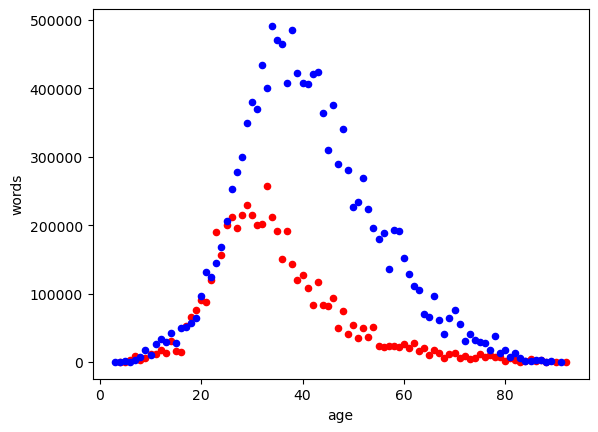

In [72]:
ax = women_age_words.plot(kind='scatter', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='scatter', x='age', y='words', color='blue')

Now let's make a line plot of the exact same data. Copy and paste the code in the cell above and change it to produce a line plot instead of a scatter plot.

<Axes: xlabel='age'>

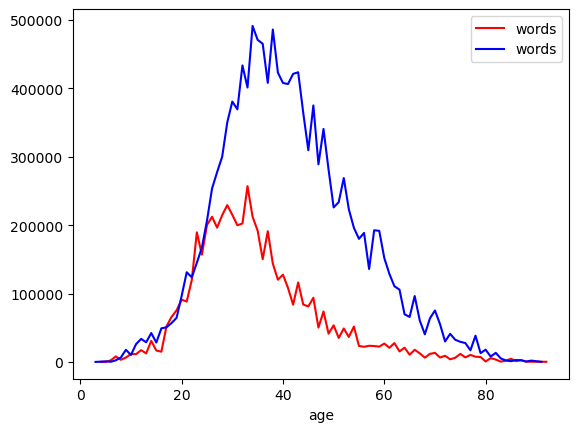

In [73]:
ax = women_age_words.plot(kind='line', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='line', x='age', y='words', color='blue')

## Reflection

Write about 250-500 words in response to each question below.

### 1. Discuss your impressions of EDA techniques?

The overall impression that I got from our exploration of EDA and EDA techniques, specifically from Python’s Pandas and NumPy libraries, is that it’s an extremely powerful tool. In general, I’ve had numerous experiences with statistics and data visualization through courses and tools like MATLAB and Excel. However, this class is my first experience with such a comprehensive look into EDA as a discipline. And suffice to say, I was extremely surprised by the amount of control these techniques allow you to have over data. For example, whenever I’ve dealt with data in the past, I’ve always calculated stats either manually or one-by-one. However, with a tool such as Python’s data frames, it’s extremely easy to generate these values through commands like info() or describe(). It’s also exceedingly easy to create various visualizations of data through the numerous selections of graphs available. However, in working my way through the various notebooks in this course, I realized that a lot of these powerful techniques need to be powerful due to the inherent difficulty of data exploration. To elaborate, looking for patterns and significance across potentially millions of lines of data would be essentially impossible without EDA techniques that allow us to identify outliers in information, filter data, group data, and so on. However, while I recognize that these are powerful tools, I also recognize that they should be used carefully. As we’ve seen and discussed before in this class, tools that summarize and handle data are very indifferent to its specific context and significance. As such, without particular care, it can be quite easy to use tools with the goal of achieving an “intended statistic” or otherwise misrepresenting the data. The example that comes to mind is the data that came from the Bellevue Almshouse, which (if not carefully considered) would lead you to conclude that being an “emigrant” was the second most frequent disease to occur. 

### 2. What were some of the hurdles that you encountered moving through the EDA process?

Luckily, I have some previous experience when it comes to coding in Python, so I wasn’t too impeded by the specific platform in which we conducted our EDA process. However, one of the biggest hurdles for me was getting used to and familiar with the various methods needed to analyze and explore the data sets provided in class. For example, it took me a while to get comfortable with the process of creating filters for data, using methods with numerous parameters, and so on. An equally challenging obstacle for me was also learning how to combine these different steps. Namely, since the data frames we primarily use in class have a lot of data condensed into them, it can require a lot of steps to extract the specific data you want to look out, for instance, if you’re isolating a specific labelled category or if you want to perform operations on a certain section of data. In fact, throughout the course, I always conceptually thought of data frames as tree-like structures that could provide a very high-level overview of information. However, to understand the “roots” of the data and observe patterns, you would have to systematically travel further down. Lastly, another challenge I had was trying to juggle many of the libraries and imports needed for particular methods. Although most of the libraries were provided for us, it was sometimes difficult to read class code that used multiple imports and understand how each one contributed to the goal we were trying to accomplish. 

### 3. Explain why you chose some of the variables and questions to pursue. Also, what questions would you explore next, and why.

For the interactive parts of this assignment, I didn’t really have an interest in a particular film, so I ultimately ended up selecting Forrest Gump without a particular reason. However, I think that, as a whole, the Pudding Film Database has a lot of questions worth exploring. For example, I think that there’s still a lot left to explore regarding the gender aspect of films. I’m personally interested to analyze how the dialogue proportion between men and women have changed throughout time, as I think that it would help shed some light on the real world-dynamic between the two groups (or at least a specific perception of that dynamic). Furthermore, I think that we can further understand female representation in films by, not just looking at female and male dialogue proportions, but by breaking them down even further. For example, we could analyze how the female dialogue proportion is divided among female characters in an effort to see how female representation is collectively presented. Finally, I think that the Pudding Film Database also has a lot of marketing and directing applications. For instance, since storytelling can be a very structured process, directors could learn which techniques work and which don’t by examining certain features in a film and correlating it with the gross revenue it generated to learn if possible relationships exist. Namely, they could see how the number of characters, words delivered, titling etc. affected the success of a film. Overall, I think that there are several compelling questions that could be further explored with a careful approach to analyzing the Pudding Database. 